In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker = '2330.tw'
stock = yf.Ticker(ticker)

data = stock.history(start="2023-07-01", end="2023-12-31", auto_adjust=True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-03 00:00:00+08:00,562.279944,564.225549,560.334339,563.252747,14785585,0.0,0.0
2023-07-04 00:00:00+08:00,569.089478,569.089478,564.225465,569.089478,17219541,0.0,0.0
2023-07-05 00:00:00+08:00,572.980761,572.980761,563.252735,566.171143,14913592,0.0,0.0
2023-07-06 00:00:00+08:00,557.415905,558.388708,549.633484,549.633484,28564891,0.0,0.0
2023-07-07 00:00:00+08:00,549.633484,556.443102,547.687879,549.633484,18796190,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-25 00:00:00+08:00,572.303774,575.253794,570.337095,571.320435,9548143,0.0,0.0
2023-12-26 00:00:00+08:00,573.287163,576.237183,572.303823,576.237183,16094308,0.0,0.0
2023-12-27 00:00:00+08:00,577.220508,582.137207,576.237168,582.137207,33401336,0.0,0.0


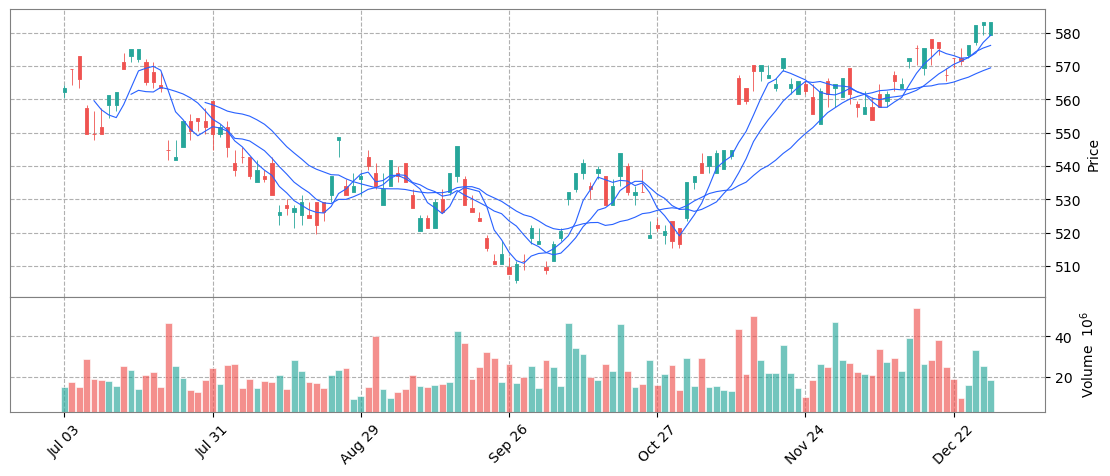

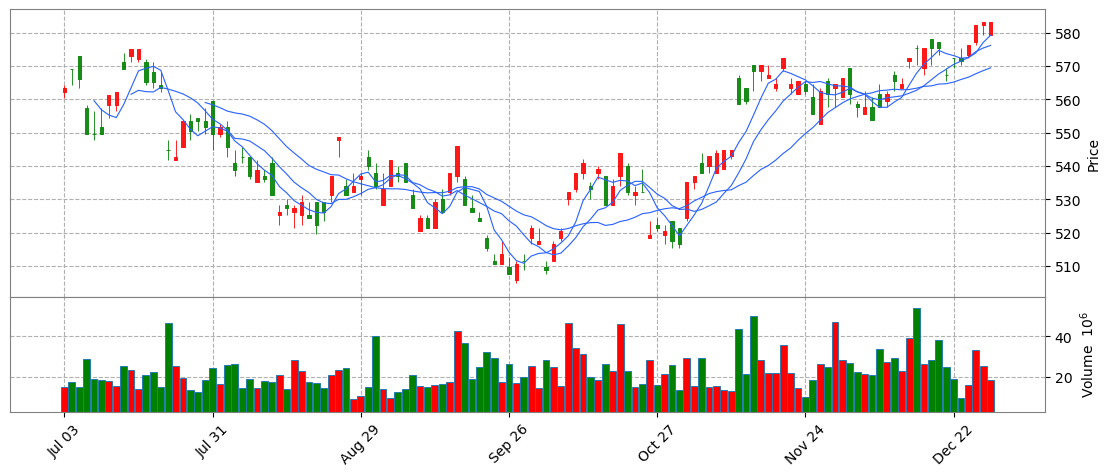

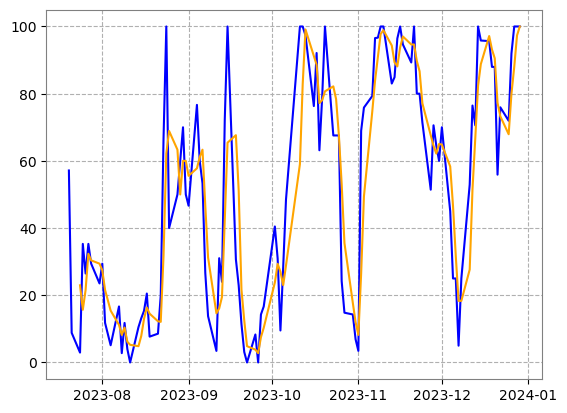

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker = '2330.tw'
stock = yf.Ticker(ticker)

data = stock.history(start="2023-07-01", end="2023-12-31", auto_adjust=True)

mpf.plot(data=data, type='candle', mav=(5, 10, 20), volume=True, figratio=(25, 10),
         style='tradingview')
mpf.available_styles()
custom_style = mpf.make_mpf_style(
    base_mpf_style="tradingview",
    marketcolors=mpf.make_marketcolors(
        up="red",
        down="green",
        edge={'up': 'red', 'down': 'green'},  # K線邊緣顏色
        wick={'up': 'red', 'down': 'green'},  # K線影線顏色
        volume={'up': 'red', 'down': 'green'}
        
    )
)
mpf.plot(data=data, type='candle', mav=(5, 10, 20), volume=True, figratio=(25, 10),
         style=custom_style)
n = 14
data["Low_min"] = data.Low.rolling(window=n).min()
data["High_max"] = data.High.rolling(window=n).max()
data['%K'] = (data.Close - data.Low_min) / (data.High_max - data.Low_min) * 100
data['%D'] = data["%K"].rolling(window=3).mean()
plt.plot(data.index, data["%K"], color="blue")
plt.plot(data.index, data["%D"], color="orange")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


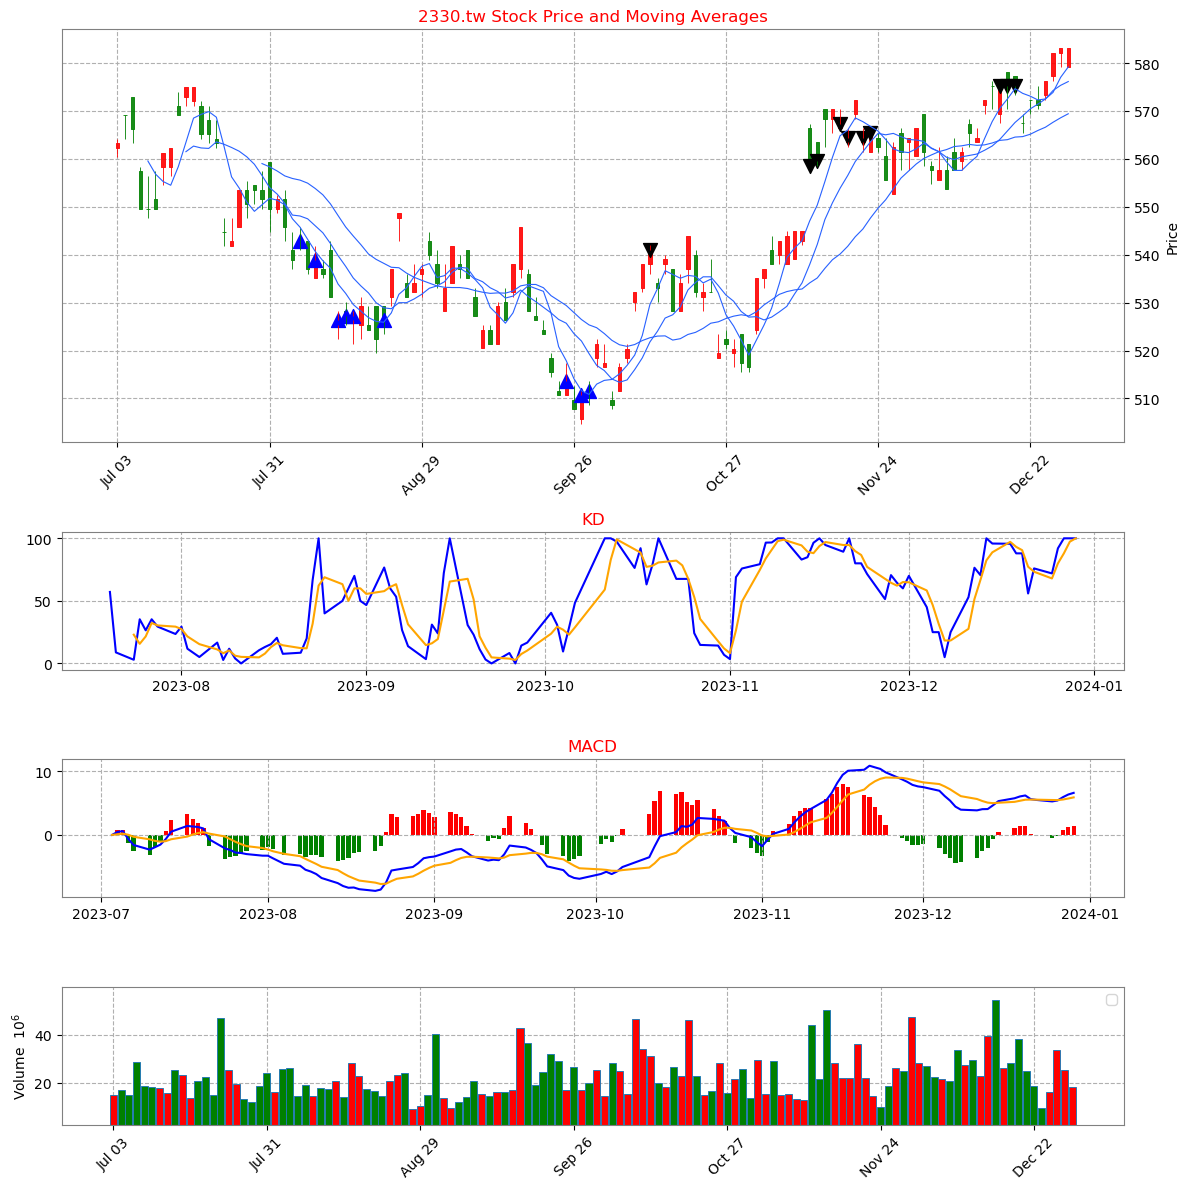

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [3, 1, 1, 1]})

custom_style = mpf.make_mpf_style(
    base_mpf_style="tradingview",
    marketcolors=mpf.make_marketcolors(
        up="red",
        down="green",
        edge={'up': 'red', 'down': 'green'},  # K線邊緣顏色
        wick={'up': 'red', 'down': 'green'},  # K線影線顏色
        volume={'up': 'red', 'down': 'green'}
        
    )
)

data["Buy_Signal"] = data.Close.where((data['%K'] < 20) & (data["%K"] > data["%D"]), pd.NA)
data["Sell_Signal"] = data.Close.where((data['%K'] > 80) & (data["%K"] < data["%D"]), pd.NA)

buy_signal = mpf.make_addplot(data.Buy_Signal, type="scatter", markersize=100, marker="^", 
                 color="blue", ax=ax[0])
sell_signal = mpf.make_addplot(data.Sell_Signal, type="scatter", markersize=100, marker="v", 
                 color="black", ax=ax[0])

apds = [buy_signal, sell_signal]

ema_12 = data.Close.ewm(span=12, adjust=False).mean()
ema_26 = data.Close.ewm(span=26, adjust=False).mean()

data["DIF"] = ema_12 - ema_26
data['DEA'] = data['DIF'].ewm(span=9, adjust=False).mean()
data['MACD'] = (data['DIF'] - data['DEA']) * 2

mpf.plot(data=data, type='candle', mav=(5, 10, 20),
         style=custom_style, ax=ax[0], volume=ax[3], addplot=apds)
ax[0].set_title(f"{ticker} Stock Price and Moving Averages")

ax[1].plot(data.index, data["%K"], color="blue", label="%K")
ax[1].plot(data.index, data["%D"], color="orange", label="%D")
ax[1].set_title("KD")

bar_colors =  ["r" if v >= 0 else "g" for v in data["MACD"]]
ax[2].plot(data.index, data["DIF"], color="blue")
ax[2].plot(data.index, data["DEA"], color="orange")
ax[2].bar(data.index, data["MACD"], color=bar_colors)
ax[2].set_title("MACD")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data

In [ ]:
n = 14
data["Low_min"] = data.Low.rolling(window=n).min()
data["High_max"] = data.High.rolling(window=n).max()

In [ ]:
data['%K'] = (data.Close - data.Low_min) / (data.High_max - data.Low_min) * 100
data['%D'] = data["%K"].rolling(window=3).mean()

In [ ]:
data

In [ ]:
plt.plot(data.index, data["%K"], color="blue")
plt.plot(data.index, data["%D"], color="orange")
plt.show()

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [3, 1, 1, 1]})

custom_style = mpf.make_mpf_style(
    base_mpf_style="tradingview",
    marketcolors=mpf.make_marketcolors(
        up="red",
        down="green",
        edge={'up': 'red', 'down': 'green'},  # K線邊緣顏色
        wick={'up': 'red', 'down': 'green'},  # K線影線顏色
        volume={'up': 'red', 'down': 'green'}
        
    )
)

data["Buy_Signal"] = data.Close.where((data['%K'] < 20) & (data["%K"] > data["%D"]), pd.NA)
data["Sell_Signal"] = data.Close.where((data['%K'] > 80) & (data["%K"] < data["%D"]), pd.NA)

buy_signal = mpf.make_addplot(data.Buy_Signal, type="scatter", markersize=100, marker="^", 
                 color="blue", ax=ax[0])
sell_signal = mpf.make_addplot(data.Sell_Signal, type="scatter", markersize=100, marker="v", 
                 color="black", ax=ax[0])

apds = [buy_signal, sell_signal]

ema_12 = data.Close.ewm(span=12, adjust=False).mean()
ema_26 = data.Close.ewm(span=26, adjust=False).mean()

data["DIF"] = ema_12 - ema_26
data['DEA'] = data['DIF'].ewm(span=9, adjust=False).mean()
data['MACD'] = (data['DIF'] - data['DEA']) * 2

mpf.plot(data=data, type='candle', mav=(5, 10, 20),
         style=custom_style, ax=ax[0], volume=ax[3], addplot=apds)
ax[0].set_title(f"{ticker} Stock Price and Moving Averages")

ax[1].plot(data.index, data["%K"], color="blue", label="%K")
ax[1].plot(data.index, data["%D"], color="orange", label="%D")
ax[1].set_title("KD")

bar_colors =  ["r" if v >= 0 else "g" for v in data["MACD"]]
ax[2].plot(data.index, data["DIF"], color="blue")
ax[2].plot(data.index, data["DEA"], color="orange")
ax[2].bar(data.index, data["MACD"], color=bar_colors)
ax[2].set_title("MACD")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data

In [ ]:
buy_signals

In [ ]:
data["Buy_Signal"] = data.Close.where((data['%K'] < 20) & (data["%K"] > data["%D"]), pd.NA)
data["Sell_Signal"] = data.Close.where((data['%K'] > 80) & (data["%K"] < data["%D"]), pd.NA)


In [ ]:
data.Buy_Signal[data.Buy_Signal.notna()]

In [ ]:
data.Sell_Signal[data.Sell_Signal.notna()]








在 `pandas` 中，`ewm` 方法用於計算指數加權移動平均（Exponential Weighted Moving Average, EWMA）。該方法提供了一些參數來調整計算方式，其中包括 `span` 和 `adjust` 等。以下是 `ewm` 方法的主要參數和 `adjust` 參數的詳細說明。

### ewm 方法的主要參數

- `com` : 默認值為None, 指數加權移動平均的平滑常數。
- `span` : 默認值為None, `span` 是另一種表示平滑常數的方法，與 `com` 相關。平滑參數 `alpha` 的計算方式如下：
  \[ \alpha = \frac{2}{\text{span} + 1} \]
- `halflife` : 默認值為None, 半衰期參數，表示觀察值衰減到一半的時間。
- `alpha` : 默認值為None, 直接設置平滑常數。
- `min_periods` : 默認值為0, 設置計算開始的最小觀察數。
- `adjust` : 默認值為True, 如果設置為True，則使用加權因子的調整；如果設置為False，則計算方法不同（詳細見下文）。
- `ignore_na` : 默認值為False, 如果設置為True，則忽略NaN值。

### adjust 參數的詳細說明

- **adjust=True**:
  當 `adjust=True` 時，計算使用調整後的加權因子。這意味著每一個數據點的權重是相對於整個序列計算的，這種方法會考慮到所有歷史數據。公式如下：

  $$ \text{EWMA}_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + \cdots}{1 + (1 - \alpha) + (1 - \alpha)^2 + \cdots} $$ 

  這種方法在序列開始時會有較大的權重影響，隨著序列的增長，早期的數據權重會逐漸減小。

- **adjust=False**:
  當 `adjust=False` 時，計算不使用調整後的加權因子，這意味著每個數據點的權重是相對於最近的觀察值計算的。公式如下：

  $$ \text{EWMA}_t = \alpha x_t + (1 - \alpha) \text{EWMA}_{t-1} $$

  這種方法更像是遞歸計算的形式，僅依賴於當前和前一個數據點的加權平均。這種計算方式對於最新數據更敏感。

### 具體例子

以下是兩種不同 `adjust` 設置方式的具體例子：

```python
import pandas as pd

# 創建一個示例數據集
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 計算使用調整加權因子的EWMA
ewm_adjust_true = data.ewm(span=3, adjust=True).mean()

# 計算不使用調整加權因子的EWMA
ewm_adjust_false = data.ewm(span=3, adjust=False).mean()

print("Adjust=True:\n", ewm_adjust_true)
print("\nAdjust=False:\n", ewm_adjust_false)
```

### 說明

在計算MACD指標時，通常使用`adjust=False`來確保計算更加側重於最近的價格變動，這樣可以更敏感地反映當前的市場狀態。

希望這些說明能幫助您更好地理解 `ewm` 方法的 `adjust` 參數及其在計算指數加權移動平均時的作用。如有其他問題，請隨時告知！



